In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
data=pd.read_csv("Data.csv")

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
for z in range(data.shape[0]):
    if data.at[z,'diagnosis']=='M':
        data.at[z,'diagnosis']=1
    else:
        data.at[z,'diagnosis']=0

# Feature Engineering Task 1

In [8]:
data=data[data.columns.difference(['id'])]

In [9]:
data_un_fill=data.copy()
data_un_norm=data.copy()
data_norm=data.copy()

In [10]:
data_un_fill=data_un_fill.dropna()

In [11]:
data_un_norm['diagnosis'].fillna(data_un_norm['diagnosis'].mode()[0],inplace=True) # Replacing categorical data with mode
data_un_norm.fillna(data_un_norm.mean(),inplace=True)# Replacing numeric data with mean


In [12]:
data_norm['diagnosis'].fillna(data_norm['diagnosis'].mode()[0],inplace=True)

data_norm.fillna(data_norm.mean(),inplace=True)

data_norm=(data_norm.drop('diagnosis',axis=1)-data_norm.drop('diagnosis',axis=1).mean())/data_norm.drop('diagnosis',axis=1).std()
data_norm=pd.concat([data_norm,data_un_norm.loc[:,['diagnosis']]],axis=1)


# Feature Engineering Task 2

# Part A- Perceptron Learning Algorithm

In [13]:
def metrics(y_test,y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(y_test.shape[0]):
        if y_test[i]==y_pred[i] and y_test[i]==1:
            tp=tp+1
        elif y_test[i]==y_pred[i] and y_test[i]==0:
            tn=tn+1
        elif y_test[i]!=y_pred[i] and y_pred[i]==1:
            fp=fp+1
        else:
            fn=fn+1

    accuracy=(tn+tp)/(tn+tp+fn+fp)
    precision= tp / (tp + fp)
    recall=tp/(tp+fn)
    f1_score=2*precision*recall/(precision+recall)
    confusion_matrix=[(tp,fp),(fn,tn)]
    df=pd.DataFrame(confusion_matrix)
    df.index.name=None

    return {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1_score,'Confusion_Matrix':df}

In [14]:
def print_metrics(label,accuracy,precision,recall,F1_score):
    print(f"Model Name: {label}\n")
    print(f"Average Accuracy: {accuracy}\n")
    print(f"Average Precision: {precision}\n")
    print(f"Average Recall: {recall}\n")
    print(f"Average F1_score: {F1_score}\n")

In [15]:
def evaluation_summary(label,model_metrics):
    print(f"Model Name: {label}\n")
    print(f"Accuracy: {model_metrics['Accuracy']}\n")
    print(f"Precision: {model_metrics['Precision']}\n")
    print(f"Recall: {model_metrics['Recall']}\n")
    print(f"F1_score: {model_metrics['F1_score']}\n")
    print(f"Confusion_Matrix:\n {model_metrics['Confusion_Matrix']}")



In [16]:
def perceptron(data,target_Attribute,user_random_seed,epochs):



    train_data=data.sample(frac=0.67,random_state=user_random_seed)
    test_data=pd.concat([data,train_data]).drop_duplicates(keep=False)
    x_train=train_data.drop('diagnosis',axis=1).values
    y_train=train_data[target_Attribute].values
    x_test=test_data.drop('diagnosis',axis=1).values
    y_test=test_data[target_Attribute].values


    row,col=x_train.shape
    w=np.zeros(col)
    l=np.zeros(row)
    for i in range(row):
        if y_train[i]==1:
            l[i]=1
        else:
            l[i]=-1
    for i in range(epochs):
        for j in range(row):
            if l[j]*np.dot(w,x_train[j,:])<=0:
                w=w+np.array(l[j]*x_train[j,:])
        else:
            break

    y_pred=np.zeros(y_test.shape[0])
    for i in range(x_test.shape[0]):
        if np.dot(w,x_test[i,:])>0:
            y_pred[i]=1
        else:
            y_pred[i]=0


    y_pred=np.zeros(y_test.shape[0])
    for i in range(x_test.shape[0]):
        if np.dot(w,x_test[i,:])>0:
            y_pred[i]=1
        else:
            y_pred[i]=0

    y_pred_train=np.zeros(y_train.shape[0])
    for i in range(x_train.shape[0]):
        if np.dot(w,x_train[i,:])>=0:
            y_pred_train[i]=1
        else:
            y_pred_train[i]=0



    return w,metrics(y_test,y_pred),metrics(y_train,y_pred_train)

# Learning Task 1

In [19]:
PM1_un_fill=[]
for i in range(10):
    model,model_test_metrics,model_train_metrics=perceptron(data_un_fill,'diagnosis',np.random.randint(1,100),1000)
    PM1_un_fill.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM1_un_fill[i][0]['Accuracy']
    precision=precision+PM1_un_fill[i][0]['Precision']
    recall=recall+PM1_un_fill[i][0]['Recall']
    F1_score=F1_score+PM1_un_fill[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM1 (without feature engineering)',accuracy,precision,recall,F1_score)

for i in range(10):
    if PM1_un_fill[i][1]['Accuracy']==1:
        print("Linearly Separable")
        break




Model Name: PM1 (without feature engineering)

Average Accuracy: 0.793010752688172

Average Precision: 0.8802480406210295

Average Recall: 0.6776982429890768

Average F1_score: 0.6885592026776425



In [22]:
PM1_un_norm=[]

for i in range(10):

    model,model_test_metrics,model_train_metrics=perceptron(data_un_norm,'diagnosis',np.random.randint(1,100),1000)
    PM1_un_norm.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM1_un_norm[i][0]['Accuracy']
    precision=precision+PM1_un_norm[i][0]['Precision']
    recall=recall+PM1_un_norm[i][0]['Recall']
    F1_score=F1_score+PM1_un_norm[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM1 (Feature Engineering 1)',accuracy,precision,recall,F1_score)

for i in range(10):
    if PM1_un_norm[i][1]['Accuracy']==1:
        print("Linearly Separable")
        break




Model Name: PM1 (Feature Engineering 1)

Average Accuracy: 0.7867021276595744

Average Precision: 0.8464018712601249

Average Recall: 0.7297667901152555

Average F1_score: 0.706797836824483



In [23]:
PM2_un_fill=[]
for i in range(10):
    model,model_test_metrics,model_train_metrics=perceptron(data_un_fill,'diagnosis',np.random.randint(1,100),1000)
    PM2_un_fill.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM2_un_fill[i][0]['Accuracy']
    precision=precision+PM2_un_fill[i][0]['Precision']
    recall=recall+PM2_un_fill[i][0]['Recall']
    F1_score=F1_score+PM2_un_fill[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM2 (without feature engineering)',accuracy,precision,recall,F1_score)

for i in range(10):
    if PM2_un_fill[i][1]['Accuracy']==1:
        print("Linearly Separable")
        break




Model Name: PM2 (without feature engineering)

Average Accuracy: 0.7403225806451613

Average Precision: 0.8228213899371095

Average Recall: 0.7112226434489142

Average F1_score: 0.6757776908527008



In [25]:
PM2_un_norm=[]
for i in range(10):
    model,model_test_metrics,model_train_metrics=perceptron(data_un_norm,'diagnosis',np.random.randint(1,100),1000)
    PM2_un_norm.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM2_un_norm[i][0]['Accuracy']
    precision=precision+PM2_un_norm[i][0]['Precision']
    recall=recall+PM2_un_norm[i][0]['Recall']
    F1_score=F1_score+PM2_un_norm[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM2 (Feature Engineering 1)',accuracy,precision,recall,F1_score)

for i in range(10):
    if PM2_un_norm[i][1]['Accuracy']==1:
        print("Linearly Separable")
        break

Model Name: PM2 (Feature Engineering 1)

Average Accuracy: 0.7792553191489362

Average Precision: 0.8300015573312802

Average Recall: 0.726941146722406

Average F1_score: 0.7165020862025514



PM1 and PM2 have similar accuracies and precision scores but differ significantly in their f1 and recall scores. PM2 has higher f1 score which indicates that PM2 has better accuracy over the test set and it also has a higher Recall Score which shows that it returns majority of all positive results as in the test

# Learning Task 2

In [27]:
PM3_norm=[]
for i in range(10):
    model,model_test_metrics,model_train_metrics=perceptron(data_norm,'diagnosis',np.random.randint(1,100),1000)
    PM3_norm.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM3_norm[i][0]['Accuracy']
    precision=precision+PM3_norm[i][0]['Precision']
    recall=recall+PM3_norm[i][0]['Recall']
    F1_score=F1_score+PM3_norm[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM3 (Feature Engineering 1 and Feature Engineering 2)',accuracy,precision,recall,F1_score)

for i in range(10):

    if PM3_norm[i][1]['Accuracy']>=0.97:
        print("Linearly Separable")
        break
else:
    print("Not Linearly Separable")



Model Name: PM3 (Feature Engineering 1 and Feature Engineering 2)

Average Accuracy: 0.9617021276595745

Average Precision: 0.9496456542090173

Average Recall: 0.9525098026033125

Average F1_score: 0.9508731535813745

Linearly Separable


PM3 has a better accuracy than PM1 and PM2 and is performing better on all metrics

# Learning Task 3

In [28]:
# Rearranging columns
permutation=np.random.permutation(31)
data_permute=data_un_norm.iloc[:,permutation]

PM4,PM4_test_metrics,PM4_train_metrics=perceptron(data_permute,'diagnosis',42,1000)
evaluation_summary('PM4',PM4_test_metrics)

Model Name: PM4

Accuracy: 0.7872340425531915

Precision: 0.95

Recall: 0.5

F1_score: 0.6551724137931034

Confusion_Matrix:
     0    1
0  38    2
1  38  110


In [29]:
PM1_test,PM1_test_metrics,PM1_train_metrics=perceptron(data_un_norm,'diagnosis',42,1000)
evaluation_summary('PM1_test',PM1_test_metrics)

Model Name: PM1_test

Accuracy: 0.7872340425531915

Precision: 0.95

Recall: 0.5

F1_score: 0.6551724137931034

Confusion_Matrix:
     0    1
0  38    2
1  38  110


PM4 has the same metrics as PM1_test which has same random seed 42. Thus we can conclude that interchanging the features will not have any effect on the final performance of the model.

In [30]:
PM4_un_norm=[]
np.random.seed(42)
for i in range(10):


    random_seed=np.random.randint(1,100)

    permutation=np.random.permutation(31)
    data_permute=data_un_norm.iloc[:,permutation]

    model_permute,model_test_metrics_permute,model_train_metrics_permute=perceptron(data_permute,'diagnosis',random_seed,1000)

    model,model_test_metrics,model_train_metrics=perceptron(data_norm,'diagnosis',random_seed,1000)

    PM4_un_norm.append([model_test_metrics,model_train_metrics])

accuracy=0
precision=0
recall=0
F1_score=0

for i in range(10):
    accuracy=accuracy+PM4_un_norm[i][0]['Accuracy']
    precision=precision+PM4_un_norm[i][0]['Precision']
    recall=recall+PM4_un_norm[i][0]['Recall']
    F1_score=F1_score+PM4_un_norm[i][0]['F1_score']

accuracy=accuracy/10
precision=precision/10
recall=recall/10
F1_score=F1_score/10

print_metrics('PM4 (Feature Engineering 1 and Feature Engineering 2)',accuracy,precision,recall,F1_score)

for i in range(10):

    if PM4_un_norm[i][1]['Accuracy']>=0.97:
        print("Linearly Separable")
        break
else:
    print("Not Linearly Separable")



Model Name: PM4 (Feature Engineering 1 and Feature Engineering 2)

Average Accuracy: 0.9122340425531913

Average Precision: 0.8662898231374374

Average Recall: 0.9165499839735244

Average F1_score: 0.887750939670728

Linearly Separable



# ---------------------------------

# Part B- Fischer Discriminant

# Learning Task 1

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
fischer_data = data_norm
fischer_data_permute=fischer_data.iloc[:,permutation]

In [33]:
import math
def probability(mean_positive, std_positive, mean_negative, std_negative, x):
    # Need to pass the data frame called train_data in place of x
    p_x_pos = (1 / math.sqrt(2 * math.pi) * std_positive) * math.exp(-0.5 * ((x - mean_positive) ** 2) / (2 * (std_positive ** 2)))
    p_x_neg = (1 / math.sqrt(2 * math.pi) * std_negative) * math.exp(-0.5 * ((x - mean_negative) ** 2) / (2 * (std_negative ** 2)))

    return p_x_pos, p_x_neg

In [34]:
def linearDiscriminantAnalysis(dataset):
    train_data_ = dataset.sample(frac=0.67, random_state=1)
    test_data_ = dataset.drop(train_data_.index)

    train_label_ = train_data_['diagnosis']
    train_features_ = train_data_.drop('diagnosis',axis=1)

    test_label_ = test_data_['diagnosis']
    test_features_ = test_data_.drop('diagnosis', axis=1)

    flda_ = LinearDiscriminantAnalysis(n_components=1)
    flda_.fit(train_features_, train_label_)

    train_features_reduced_ = flda_.transform(train_features_)
    test_features_reduced_ = flda_.transform(test_features_)

    pos_mean_ = np.mean(train_features_reduced_[train_label_==1])
    pos_std_ = np.std(train_features_reduced_[train_label_==1])
    neg_mean_ = np.mean(train_features_reduced_[train_label_==0])
    neg_std_ = np.std(train_features_reduced_[train_label_==0])

    p_pos_ = len(train_data_[train_data_['diagnosis'] == 1])/len(train_data_)
    p_neg_ = 1 - p_pos_

    y_pred_ = np.zeros(test_features_reduced_.shape[0])

    for i in range(len(test_features_reduced_)):
        p_x_pos_, p_x_neg_ = probability(pos_mean_, pos_std_, neg_mean_, neg_std_, test_features_reduced_[i])
        p_x_pos_ *= p_pos_
        p_x_neg_ *= p_neg_
        if p_x_pos_ > p_x_neg_:
            y_pred_[i] = 1

    y_test_ = test_label_.to_numpy(dtype=np.float64)

    count_ = 0
    confusion_matrix1_ = np.zeros([2, 2], dtype=int)
    for j in range(y_pred_.shape[0]):
        if y_pred_[j] == 1:
            if y_test_[j] == 1:
                confusion_matrix1_[0, 0] += 1
                count_ += 1
            else:
                confusion_matrix1_[0, 1] += 1
        else:
            if y_test_[j] == 1:
                confusion_matrix1_[1, 0] += 1
            else:
                confusion_matrix1_[1, 1] += 1
                count_ += 1
    accuracy1_ = count_ / y_pred_.shape[0]
    precision1_ = (confusion_matrix1_[0, 0]/(confusion_matrix1_[0,0] + confusion_matrix1_[0,1]))
    recall_score1_ = (confusion_matrix1_[0,0]/(confusion_matrix1_[0,0] + confusion_matrix1_[1,0]))
    f1_score1_=2*precision1_*recall_score1_/(precision1_+recall_score1_)

    return accuracy1_, precision1_, recall_score1_, f1_score1_

In [35]:
running_accuracy = 0.0
running_precision = 0.0
running_recall = 0.0
running_f1 = 0.0

for _ in range(10):
    x = fischer_data.sample(frac=1).reset_index()
    a, p, r, f = linearDiscriminantAnalysis(x)
    running_accuracy += a
    running_precision += p
    running_recall += r
    running_f1 += f

running_accuracy /= 10
running_precision /= 10
running_recall /= 10
running_f1 /= 10

In [36]:
print(f"Accuracy = {running_accuracy}")
print(f"Precision = {running_precision}")
print(f"Recall = {running_recall}")
print(f"F1_score = {running_f1}")

Accuracy = 0.9622340425531914
Precision = 0.9312925052755142
Recall = 0.9661790857386192
F1_score = 0.947994947468802


# Learning Task 2

In [47]:
running_accuracy = 0.0
running_precision = 0.0
running_recall = 0.0
running_f1 = 0.0

for _ in range(10):
    x = fischer_data_permute.sample(frac=1).reset_index()
    a, p, r, f = linearDiscriminantAnalysis(x)
    running_accuracy += a
    running_precision += p
    running_recall += r
    running_f1 += f

running_accuracy /= 10
running_precision /= 10
running_recall /= 10
running_f1 /= 10

In [48]:
print(f"Accuracy = {running_accuracy}")
print(f"Precision = {running_precision}")
print(f"Recall = {running_recall}")
print(f"F1_score = {running_f1}")

Accuracy = 0.9648936170212767
Precision = 0.9454827305754598
Recall = 0.9574993477050444
F1_score = 0.950584902186215


# Part C- Logistic Regression

In [57]:
# warnings.filterwarnings('ignore')
import scipy as sc

In [142]:
def sigmoid(z):

    return float(1.0)/(float(1.0)+np.exp(-z))


In [232]:
def SGD(x_train,y_train,alpha,epochs):
    row,col=x_train.shape[0],x_train.shape[1]
    w=np.zeros(col)
    w_it=[]
    loss_it=[]
    for i in range(epochs):
        delta=np.zeros(col)
        loss=0
        for j in range(col):
            x_n=x_train[i%row,:]
            t_n=y_train[i%row]
            y_n=sigmoid(np.dot(w,x_n))
            delta[j]+=(y_n-t_n)*(x_n[j])


        sig=sigmoid(np.dot(w,x_train[i%row,:]))
        if sig==0:
            sig=0.001
        if sig==1:
            sig=0.999
        loss+=(y_train[i%row]*np.log(sig)+(1-y_train[i%row])*np.log(1-sig))
        loss*=-1
        w_it.append(w)
        if i>1:
            loss_it.append(loss)
        w=w-alpha*delta
    return w,loss_it


In [233]:
def batch_gradient_descent(x_train,y_train,alpha,epochs):
    row,col=x_train.shape[0],x_train.shape[1]
    w=np.zeros(col)

    w_it=[]
    loss_it=[]
    for i in range(epochs):
        delta=np.zeros(col)
        loss=0
        for j in range(col):
            for k in range(row):
                t_n=y_train[k]
                x_n=x_train[k,:]
                y_n=sigmoid(np.dot(w,x_n))
                delta[j]+=(y_n-t_n)*(x_n[j])

        for j in range(row):
            sig=sigmoid(np.dot(w,x_train[j,:]))
            if sig==0:
                sig=0.001
            if sig==1:
                sig=0.999
            loss+=(y_train[j]*np.log(sig)+(1-y_train[j])*np.log(1-sig))
        loss*=-1

        w_it.append(w)
        if i>1:
            loss_it.append(loss)
        w=w-alpha*delta




    return w,loss_it



In [234]:
def mini_batch_gradient_descent(train_data,alpha,epochs,batch_size):
    row=train_data.shape[0]
    if batch_size>=row:
        batch_size=row/2
    frac_batch=batch_size/row
    w=np.zeros(train_data.shape[1]-1)

    w_it=[]
    loss_it=[]
    for i in range(epochs):
        temp_data=data.sample(frac=frac_batch,random_state=np.random.randint(1,100))
        x_train=train_data.drop('diagnosis',axis=1).values
        y_train=train_data['diagnosis'].values
        epoch_row,epoch_col=x_train.shape
        delta=np.zeros(epoch_col)
        loss=0
        for j in range(epoch_col):
            for k in range(epoch_row):
                t_n=y_train[k]
                x_n=x_train[k,:]
                y_n=sigmoid(np.dot(w,x_n))
                delta[j]+=(y_n-t_n)*(x_n[j])

        for j in range(epoch_row):
            sig=sigmoid(np.dot(w,x_train[j,:]))
            if sig==0:
                sig=0.001
            if sig==1:
                sig=0.999
            loss+=(y_train[j]*np.log(sig)+(1-y_train[j])*np.log(1-sig))
        loss*=-1

        w_it.append(w)
        if i>1:
            loss_it.append(loss)
        w=w-alpha*delta

    return w,loss_it

In [244]:
def logistic_regression(data,target_Attribute,epochs,user_random_seed,thresh_hold,alpha,type_of_GD):
    train_data=data.sample(frac=0.67,random_state=user_random_seed)
    test_data=pd.concat([data,train_data]).drop_duplicates(keep=False)
    x_train=train_data.drop('diagnosis',axis=1).values
    y_train=train_data[target_Attribute].values
    x_test=test_data.drop('diagnosis',axis=1).values
    y_test=test_data[target_Attribute].values


    row,col=x_train.shape[0],x_train.shape[1]
    if type_of_GD=="GD":
        w,loss_it=batch_gradient_descent(x_train,y_train,alpha,epochs)
    elif type_of_GD=="SGD":
        w,loss_it=SGD(x_train,y_train,alpha,epochs)
    else:
        w,loss_it=mini_batch_gradient_descent(train_data,alpha,epochs,40)
    plt.figure(figsize=(10,3))
    plt.plot( np.arange(1,epochs-1,1),loss_it,color=np.random.rand(3,))

    y_pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):

        if sigmoid(np.dot(w,x_test[i,:]))>=thresh_hold:

            y_pred[i]=1
        else:
            y_pred[i]=0

    return w,metrics(y_test,y_pred)

In [245]:
def ten_split_LR_Avg(data,target_Attribute,epochs,thresh_hold,alpha,type_of_GD,model_name):
    LR=[]
    for i in range(10):
        w,model_test_metrics=logistic_regression(data,target_Attribute,epochs,np.random.randint(1,100),thresh_hold,alpha,type_of_GD)
        LR.append(model_test_metrics)
    accuracy=0
    precision=0
    recall=0
    f1_score=0

    for i in range(10):
        accuracy=accuracy+LR[i]['Accuracy']
        precision=precision+LR[i]['Precision']
        recall=recall+LR[i]['Recall']
        f1_score=f1_score+LR[i]['F1_score']

    accuracy=accuracy/10
    precision=precision/10
    recall=recall/10
    f1_score=f1_score/10
    print_metrics(model_name,accuracy,precision,recall,f1_score)





# Learning Task 1

Threshold=0.5

Model Name: LR1(Threshold=0.5, learning rate=0.01, Batch Gradient Descent)

Average Accuracy: 0.8473118279569892

Average Precision: 0.8663272919953432

Average Recall: 0.7461585962903697

Average F1_score: 0.7515365794539371



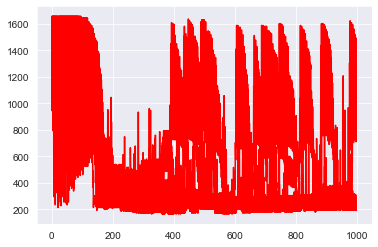

In [148]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.5,0.01,'GD',"LR1(Threshold=0.5, learning rate=0.01, Batch Gradient Descent)")

In [223]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.5,0.001,'MGD',"LR1(Threshold=0.5, learning rate=0.001, Mini batch Gradient Descent)")

KeyboardInterrupt: 

Model Name: LR1(Threshold=0.5, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.6806451612903226

Average Precision: 0.6252125572549796

Average Recall: 0.9428473703129485

Average F1_score: 0.721751941794266



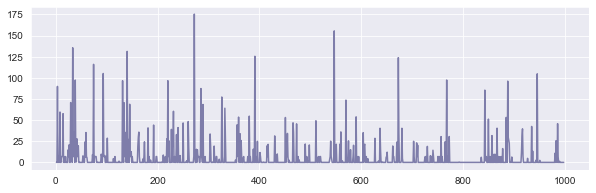

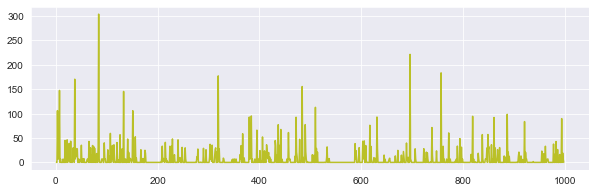

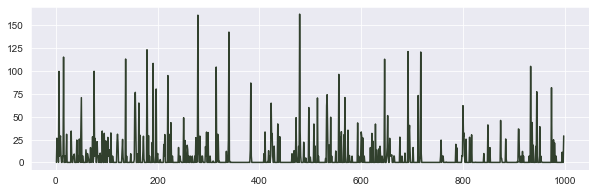

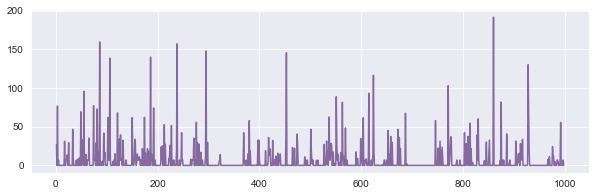

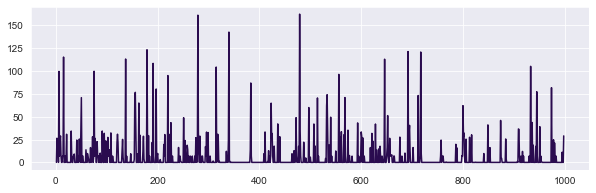

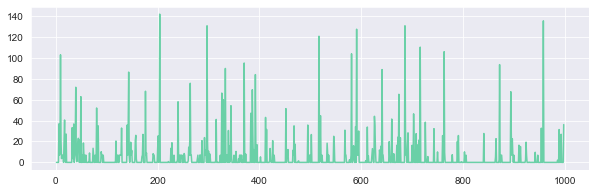

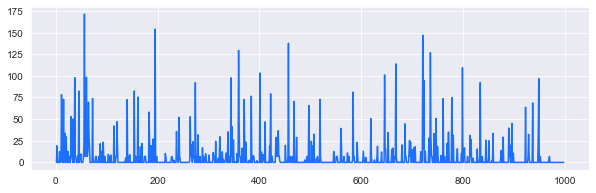

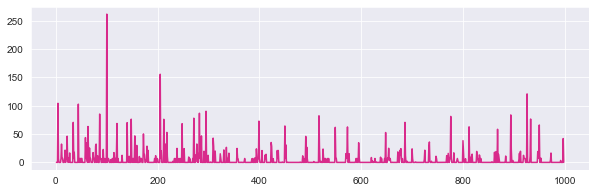

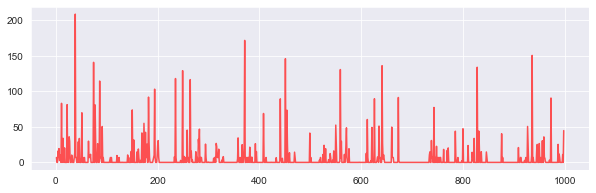

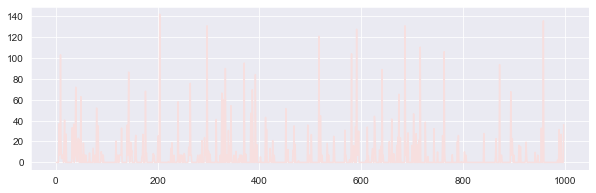

In [246]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.5,0.0001,'SGD',"LR1(Threshold=0.5, learning rate=0.0001, Stochastic Gradient Descent)")

Threshhold=0.3

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.3,0.01,'GD',"LR1(Threshold=0.3, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.3,0.001,'MGD',"LR1(Threshold=0.3, learning rate=0.001, Mini batch Gradient Descent)")

ValueError: x and y must have same first dimension, but have shapes (99,) and (7,)

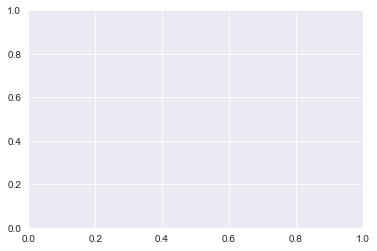

In [216]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.3,0.0001,'SGD',"LR1(Threshold=0.3, learning rate=0.0001, Stochastic Gradient Descent)")

Threshhold=0.4

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.4,0.01,'GD',"LR1(Threshold=0.4, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.4,0.001,'MGD',"LR1(Threshold=0.4, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Threshold=0.4, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.8564516129032258

Average Precision: 0.8962390918158555

Average Recall: 0.7439734977108413

Average F1_score: 0.7883922939975092



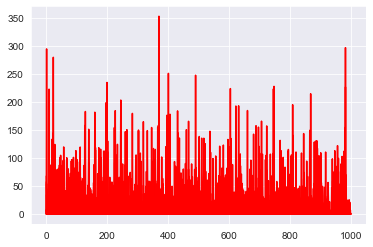

In [195]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.4,0.0001,'SGD',"LR1(Threshold=0.4, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.6

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.6,0.01,'GD',"LR1(Threshold=0.6, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.6,0.001,'MGD',"LR1(Threshold=0.6, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Threshold=0.6, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.7451612903225805

Average Precision: 0.823972988196544

Average Recall: 0.6877573737033776

Average F1_score: 0.6695488137006484



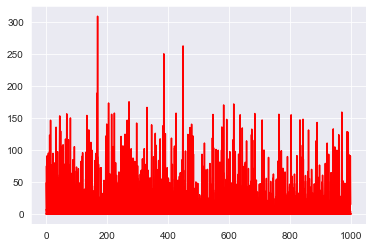

In [196]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.6,0.0001,'SGD',"LR1(Threshold=0.6, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.7

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.7,0.01,'GD',"LR1(Threshold=0.7, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.7,0.001,'MGD',"LR1(Threshold=0.7, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Threshold=0.7, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.7413978494623656

Average Precision: 0.7577232198473287

Average Recall: 0.7792773921072178

Average F1_score: 0.7064441020836252



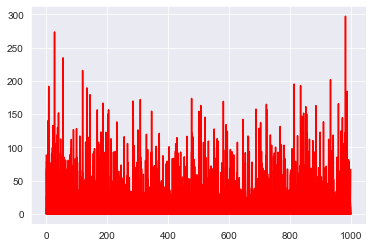

In [197]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.7,0.0001,'SGD',"LR1(Threshold=0.7, learning rate=0.0001, Stochastic Gradient Descent)")

# Learning Task 2

Threshold=0.5

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.01, Batch Gradient Descent)

Average Accuracy: 0.9675531914893618

Average Precision: 0.9609391654097538

Average Recall: 0.948384404924313

Average F1_score: 0.9544851543821012



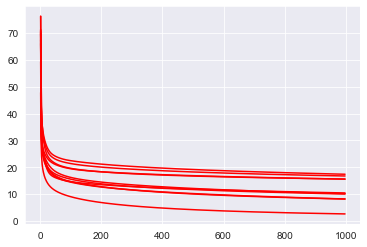

In [151]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.5,0.01,'GD',"LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.01, Batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.001, Mini batch Gradient Descent)

Average Accuracy: 0.9771276595744682

Average Precision: 0.9727829217061803

Average Recall: 0.9664251802443712

Average F1_score: 0.9695664207972182



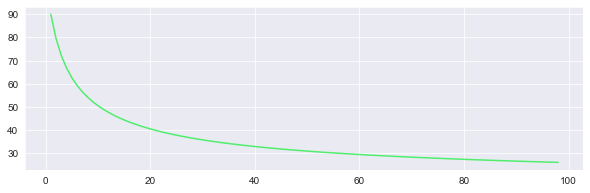

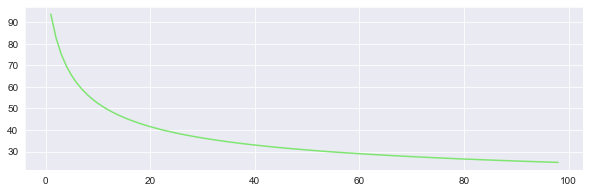

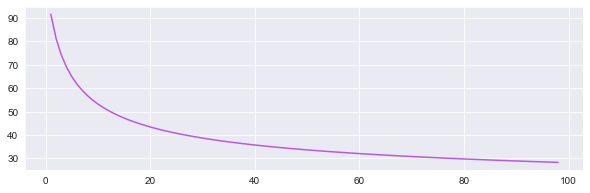

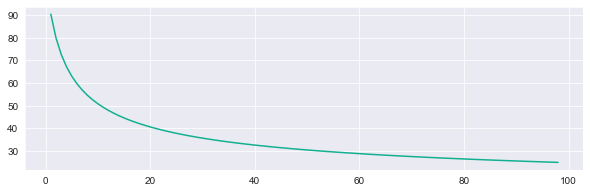

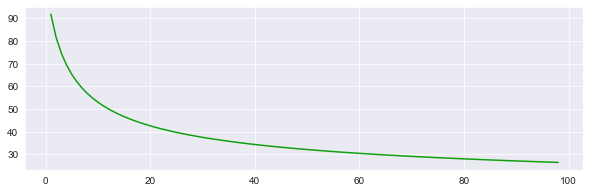

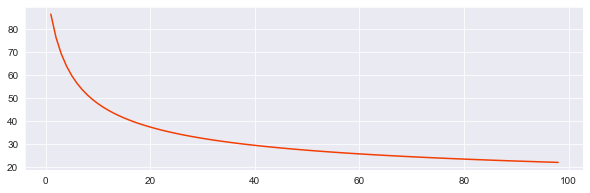

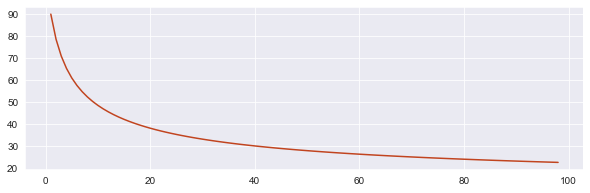

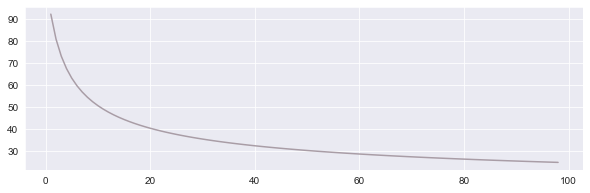

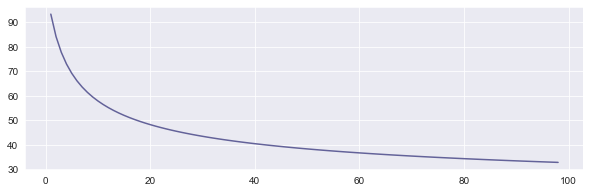

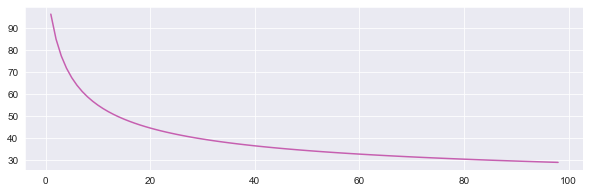

In [248]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.5,0.001,'MGD',"LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.9398936170212767

Average Precision: 0.9211399396881031

Average Recall: 0.925152634018359

Average F1_score: 0.9228359209719901



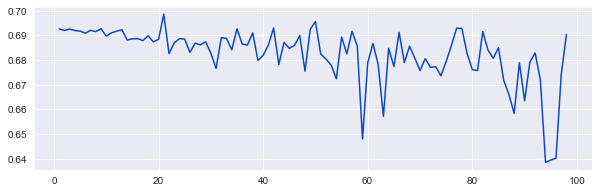

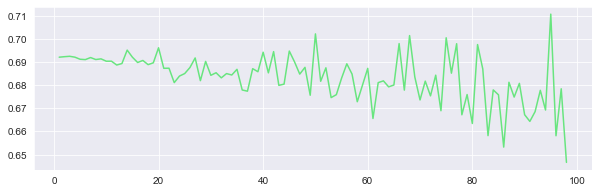

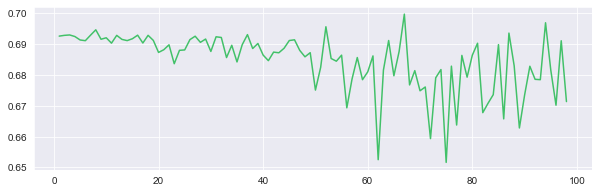

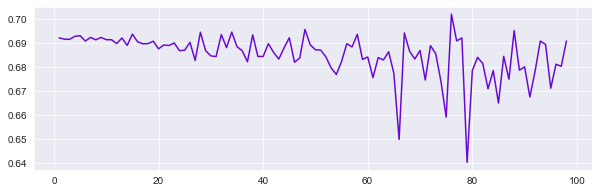

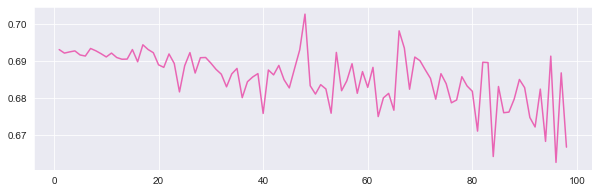

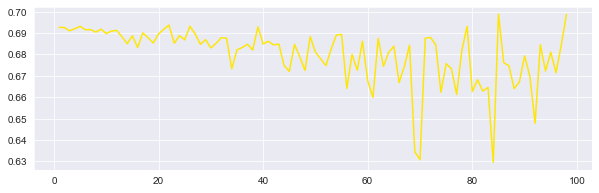

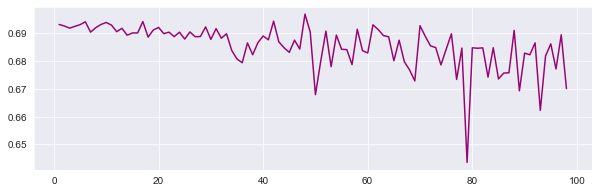

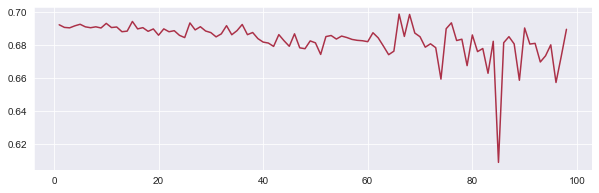

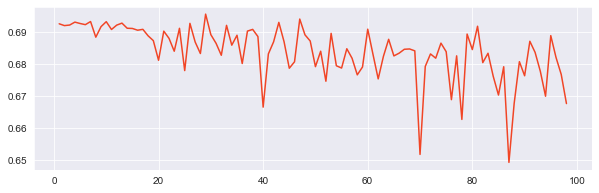

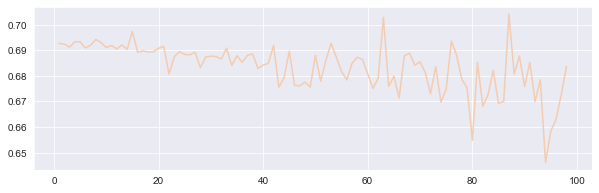

In [249]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.5,0.0001,'SGD',"LR1(Feature Engineering 1 and 2, Threshold=0.5, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.3

In [ ]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.3,0.01,'GD',"LR1(Feature Engineering 1 and 2, Threshold=0.3, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.3,0.001,'MGD',"LR1(Feature Engineering 1 and 2, Threshold=0.3, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.3, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.38031914893617025

Average Precision: 0.38031914893617025

Average Recall: 1.0

Average F1_score: 0.5500666356037369



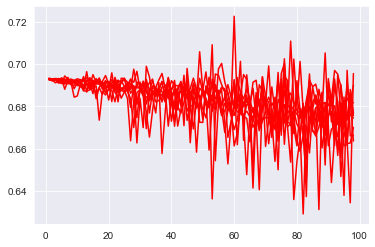

In [200]:
ten_split_LR_Avg(data_norm,'diagnosis',100,0.3,0.0001,'SGD',"LR1(Feature Engineering 1 and 2, Threshold=0.3, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.4

In [ ]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.4,0.01,'GD',"LR1(Feature Engineering 1 and 2, Threshold=0.4, learning rate=0.01, Batch Gradient Descent)")

In [ ]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.4,0.001,'MGD',"LR1(Feature Engineering 1 and 2, Threshold=0.4, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.4, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.5063829787234042

Average Precision: 0.43154456955292203

Average Recall: 1.0

Average F1_score: 0.6022936623930363



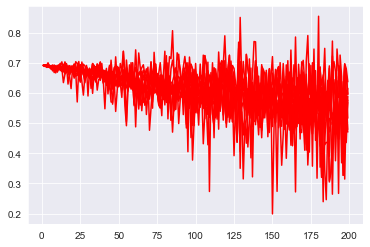

In [225]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.4,0.0001,'SGD',"LR1(Feature Engineering 1 and 2, Threshold=0.4, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.6

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.6, learning rate=0.01, Batch Gradient Descent)

Average Accuracy: 0.9670212765957447

Average Precision: 0.9718180736092992

Average Recall: 0.9389509845292505

Average F1_score: 0.9550449388304472



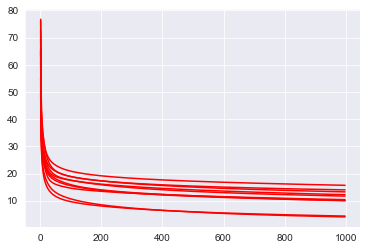

In [170]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.6,0.01,'GD',"LR1(Feature Engineering 1 and 2, Threshold=0.6, learning rate=0.01, Batch Gradient Descent)")

KeyboardInterrupt: 

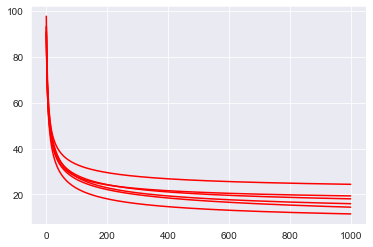

In [171]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.6,0.001,'MGD',"LR1(Feature Engineering 1 and 2, Threshold=0.6, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.6, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.8123655913978496

Average Precision: 0.8594744965751318

Average Recall: 0.7960926984381395

Average F1_score: 0.7875637844017979



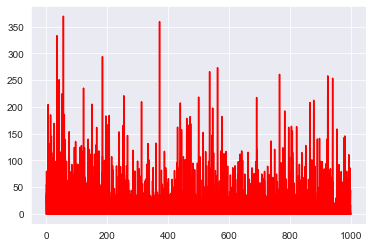

In [202]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.6,0.0001,'SGD',"LR1(Feature Engineering 1 and 2, Threshold=0.6, learning rate=0.0001, Stochastic Gradient Descent)")

Threshold=0.7

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.01, Batch Gradient Descent)

Average Accuracy: 0.973936170212766

Average Precision: 0.9941980239646837

Average Recall: 0.936330942690755

Average F1_score: 0.9642170165682318



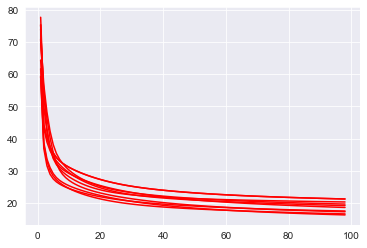

In [175]:
ten_split_LR_Avg(data_norm,'diagnosis',1000,0.7,0.01,'GD',"LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.01, Batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.001, Mini batch Gradient Descent)

Average Accuracy: 0.9696808510638301

Average Precision: 0.9970355731225297

Average Recall: 0.9240006155715429

Average F1_score: 0.9589686412097324



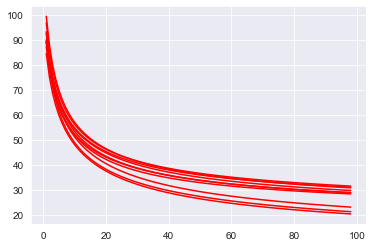

In [176]:
ten_split_LR_Avg(data_norm,'diagnosis',100,0.7,0.001,'MGD',"LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.001, Mini batch Gradient Descent)")

Model Name: LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.0001, Stochastic Gradient Descent)

Average Accuracy: 0.7376344086021506

Average Precision: 0.7416228802810785

Average Recall: 0.850045116469774

Average F1_score: 0.7402491125125986



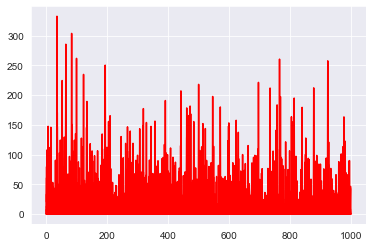

In [203]:
ten_split_LR_Avg(data_un_fill,'diagnosis',1000,0.7,0.0001,'SGD',"LR1(Feature Engineering 1 and 2, Threshold=0.7, learning rate=0.0001, Stochastic Gradient Descent)")